In [12]:
!python -m pip install multiple-hypothesis-testing

In [13]:
try:
    from google.colab import drive
    drive.mount('/content/gdrive/')
    # import glob; print(glob.glob('/content/gdrive/Othercomputers/My Laptop/projects/RUNI/Thesis/*'))
    import sys
    sys.path.append('/content/gdrive/Othercomputers/My Laptop/projects/RUNI/Thesis')
except:
    pass

In [14]:
from Higher_Criticism import Higher_Criticism
higher_criticism = Higher_Criticism(use_import=False)

In [15]:
import scipy
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'monospace'


In [16]:

N = 1000
monte_carlo=10000
alpha = 0.05

nums_rejected = []
best_objectives = []
for i in tqdm(range(monte_carlo)):
    np.random.seed(i)
    p = np.random.uniform(size=N)
    higher_criticism.run_unsorted_p(p)
    best_objectives.append(higher_criticism.best_objective)
    nums_rejected.append(higher_criticism.num_rejected)


100%|██████████| 10000/10000 [00:03<00:00, 2809.71it/s]


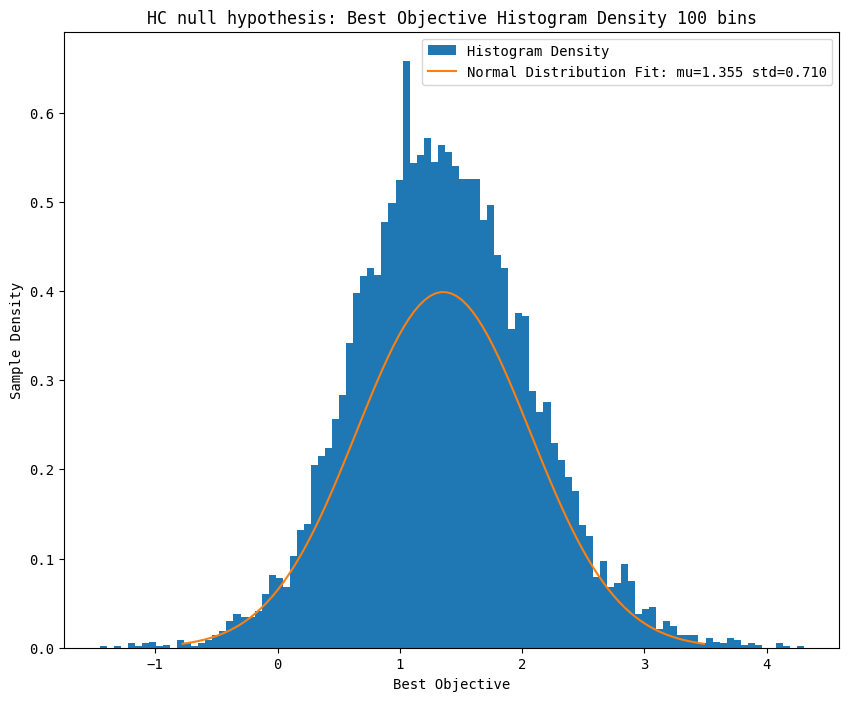

In [17]:
mu = np.mean(best_objectives)
std = np.std(best_objectives)
bins = int(len(best_objectives)**0.5 + 0.01)
plt.figure(figsize=(10,8))
plt.title(label=f'HC null hypothesis: Best Objective Histogram Density {bins} bins')
plt.hist(best_objectives, bins=bins, density=True, label='Histogram Density')
x = np.linspace(-3, +3, 100)
plt.plot(mu + x*std, scipy.stats.norm.pdf(x, 0, 1), label=f'Normal Distribution Fit: mu={mu:.3f} std={std:.3f}')
plt.xlabel(xlabel='Best Objective')
plt.ylabel(ylabel='Sample Density')
plt.legend()
plt.show()


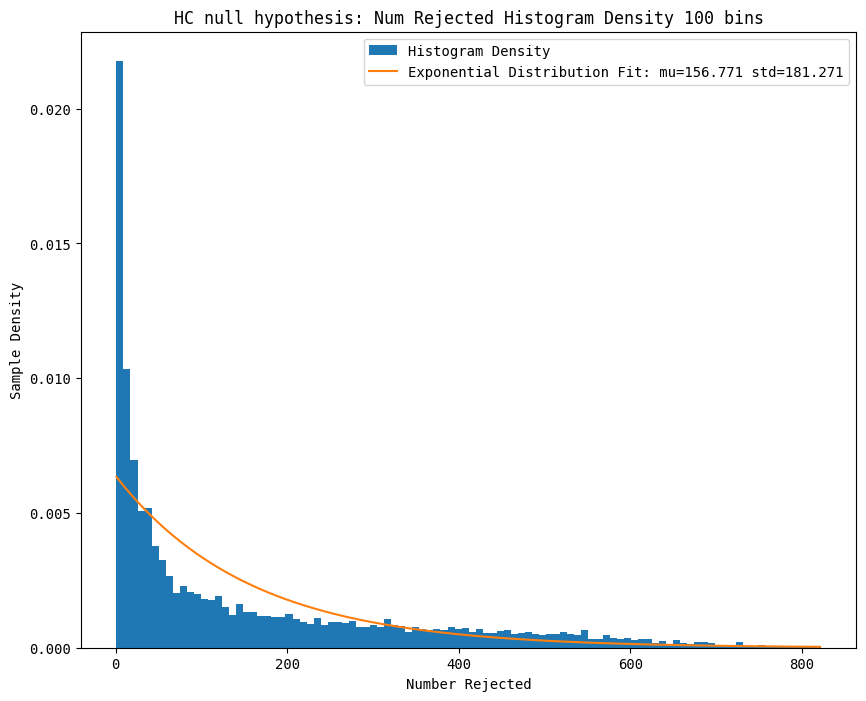

In [18]:
mu = np.mean(nums_rejected)
std = np.std(nums_rejected)
bins = int(len(nums_rejected)**0.5 + 0.01)
plt.figure(figsize=(10,8))
plt.title(label=f'HC null hypothesis: Num Rejected Histogram Density {bins} bins')
plt.hist(nums_rejected, bins=bins, density=True, label='Histogram Density')
x = np.arange(1,max(nums_rejected))
plt.plot(x, scipy.stats.expon.pdf(x, scale=mu),
         label=f'Exponential Distribution Fit: mu={mu:.3f} std={std:.3f}')
plt.xlabel(xlabel='Number Rejected')
plt.ylabel(ylabel='Sample Density')
plt.legend()
plt.show()


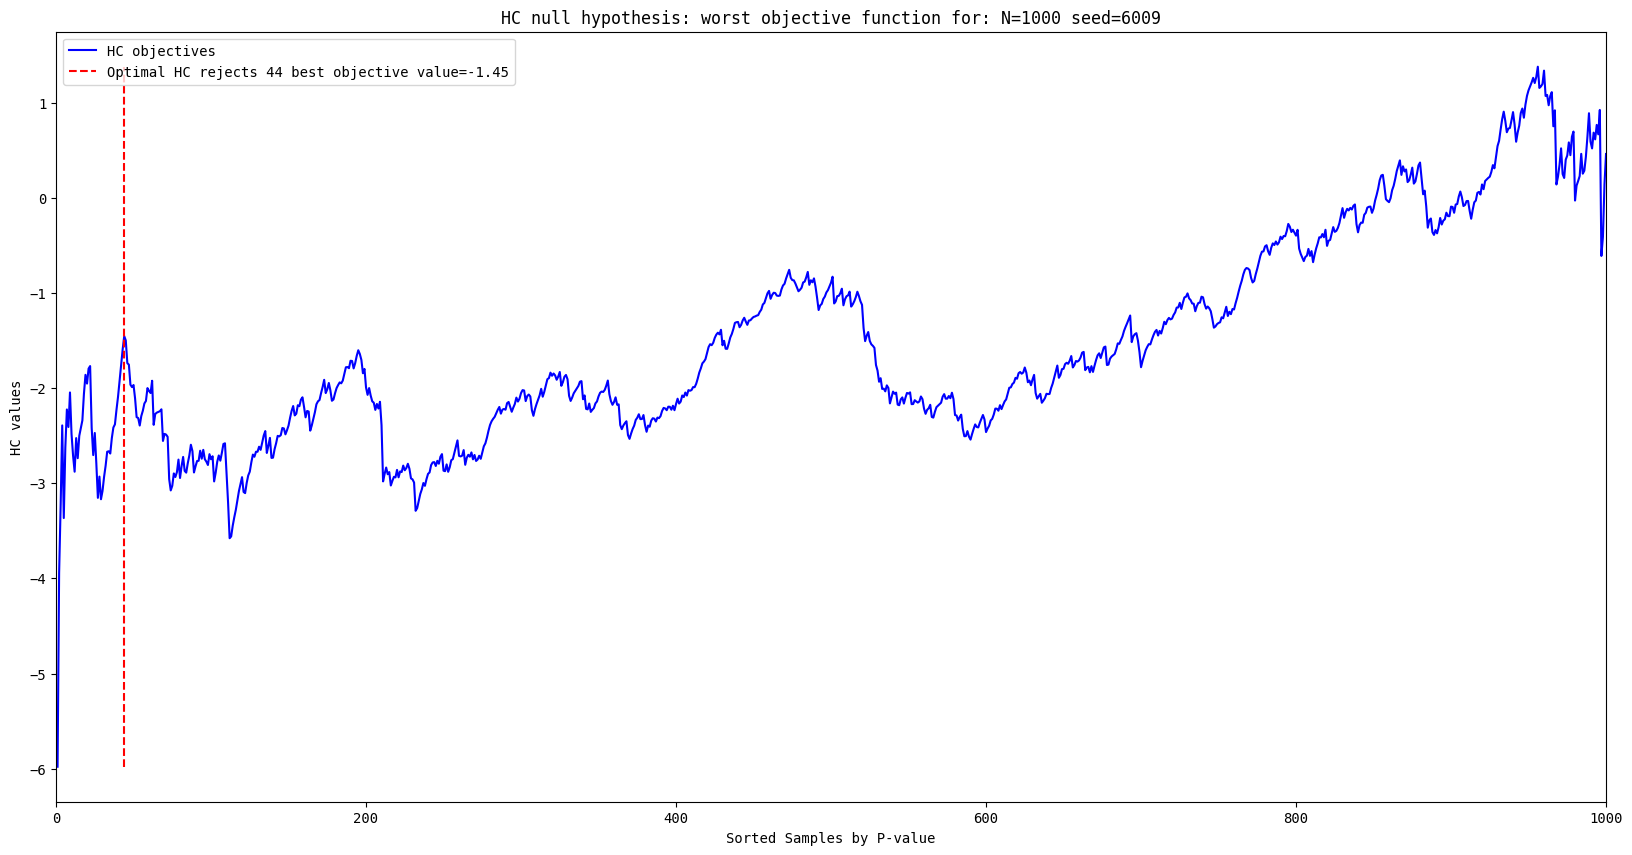

In [19]:

seed_worst_objective = np.argmin(best_objectives)
np.random.seed(seed=seed_worst_objective)
p = np.random.uniform(size=N)
higher_criticism.run_unsorted_p(p)
higher_criticism.plot_objectives(f'HC null hypothesis: worst objective function for: N={N} seed={seed_worst_objective}')


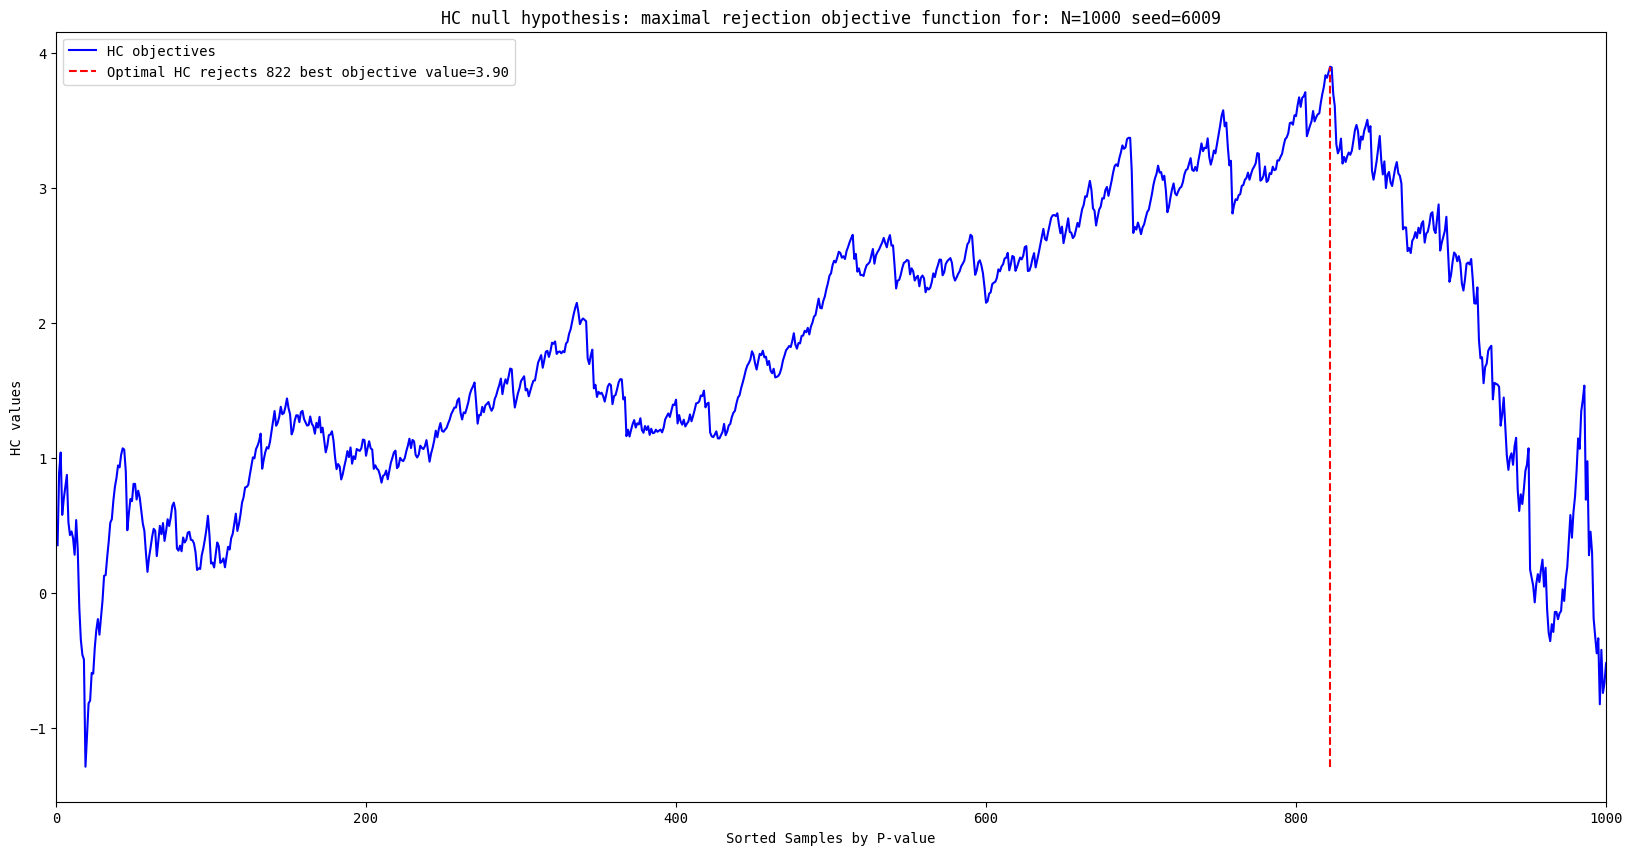

In [20]:

seed_maximal_rejections = np.argmax(nums_rejected)
np.random.seed(seed=seed_maximal_rejections)
p = np.random.uniform(size=N)
higher_criticism.run_unsorted_p(p)
higher_criticism.plot_objectives(f'HC null hypothesis: maximal rejection objective function for: N={N} seed={seed_worst_objective}')


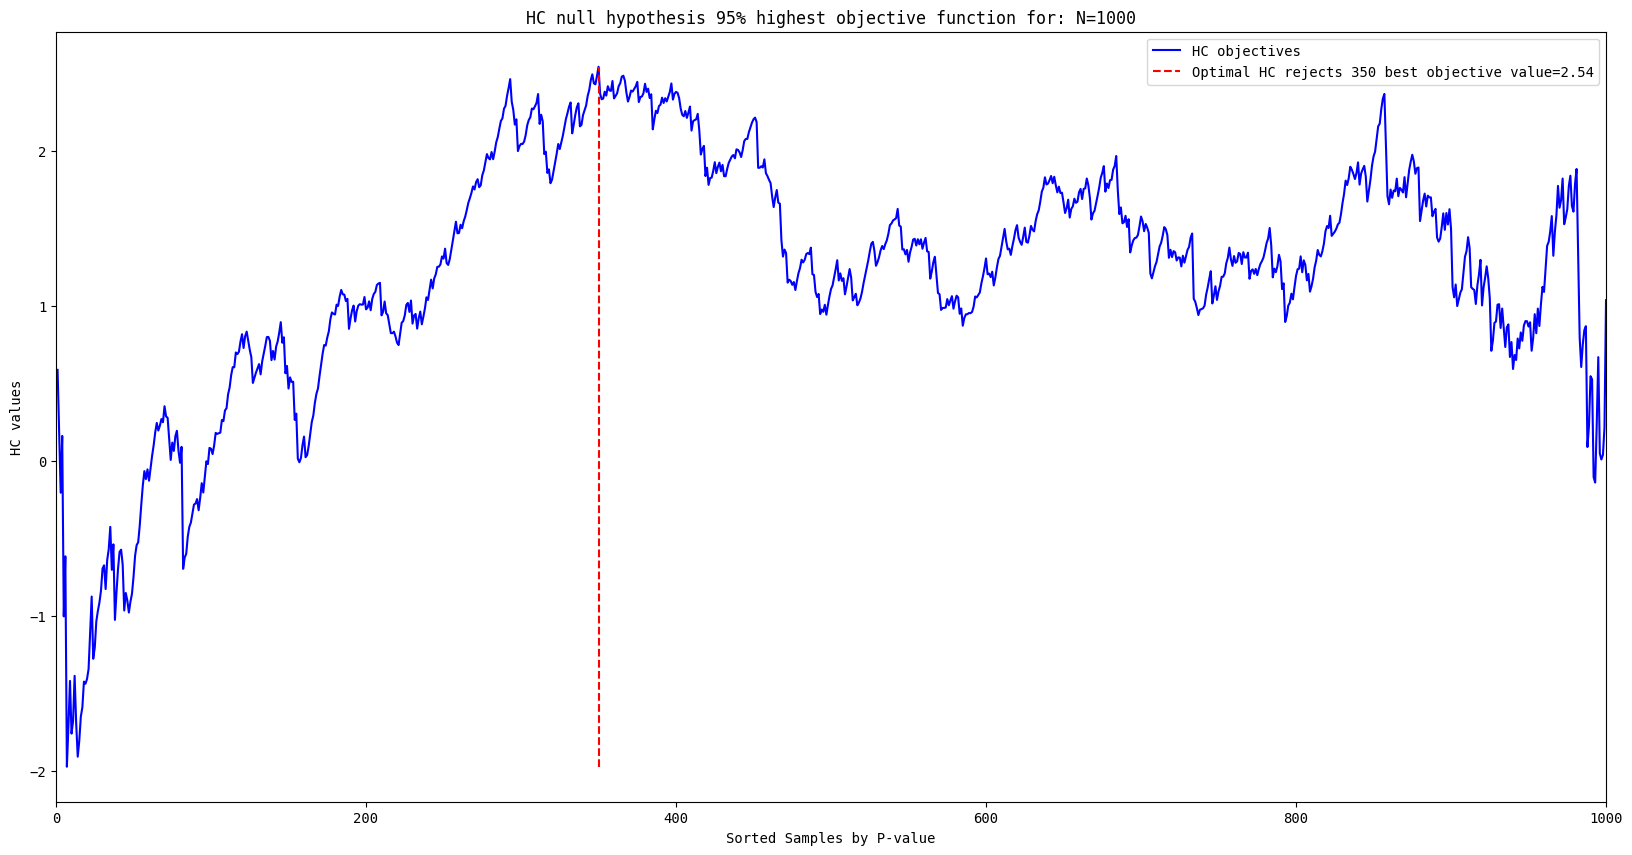

In [21]:

seed_null_objective_95 = np.argsort(best_objectives)[int(monte_carlo*(1-alpha))]
np.random.seed(seed=seed_null_objective_95)
p = np.random.uniform(size=N)
higher_criticism.run_unsorted_p(p)
higher_criticism.plot_objectives(f'HC null hypothesis 95% highest objective function for: N={N}')


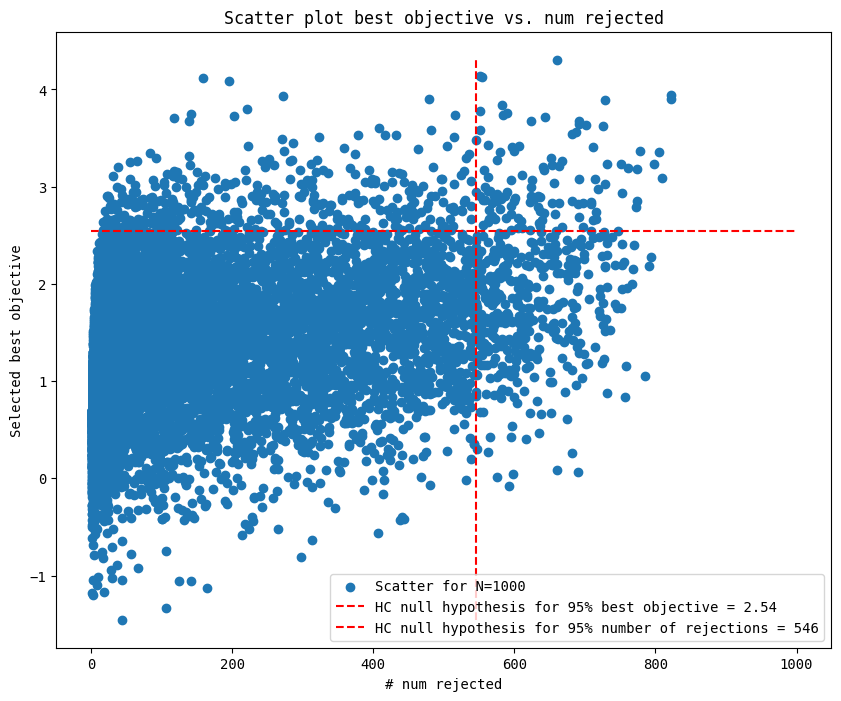

In [24]:
best_objective_threshold = best_objectives[seed_null_objective_95]
seed_null_rejection_95 = np.argsort(nums_rejected)[int(monte_carlo*(1-alpha))]
best_rejection_threshold = nums_rejected[seed_null_rejection_95]
plt.figure(figsize=(10,8))
plt.title(label=f'Scatter plot best objective vs. num rejected')
plt.scatter(x = nums_rejected, y=best_objectives, label=f'Scatter for N={N}')
plt.hlines(xmin=0, xmax=N-1, y=best_objective_threshold,
           label=f'HC null hypothesis for 95% best objective = {best_objective_threshold:.2f}',
           linestyles='dashed', colors='red')
plt.vlines(ymin=np.min(best_objectives), ymax=np.max(best_objectives), x=best_rejection_threshold,
           label=f'HC null hypothesis for 95% number of rejections = {best_rejection_threshold}',
           linestyles='dashed', colors='red')
plt.xlabel(xlabel='# num rejected')
plt.ylabel(ylabel='Selected best objective')
plt.legend()
plt.show()
